In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Automobiledata.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.shape

(205, 26)

In [5]:
df.isnull().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
for col in df.columns:
    if ('?' in df[col].values):
        print(col + " = " + str(len(df[df[col]== '?'])))

normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


C:\Users\hp\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [8]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
df[df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [10]:
df.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [11]:
df['price'] = df['price'].replace('?', np.nan)
df['price'] = pd.to_numeric(df['price'])
df = df[df['price'].notna()]

In [12]:
df['num-of-doors'] = df['num-of-doors'].replace('?', np.nan)
df = df[df['num-of-doors'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [13]:
df.price.unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
       16430., 16925., 20970., 21105., 24565., 30760., 41315., 36880.,
        5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,  6692.,
        7609.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,  7129.,
        7295.,  7895.,  9095.,  8845., 10295., 12945., 10345.,  6785.,
       11048., 32250., 35550., 36000.,  5195.,  6095.,  6795.,  6695.,
        7395., 10945., 11845., 13645., 15645.,  8495., 10595., 10245.,
       11245., 18280., 18344., 25552., 28248., 28176., 31600., 34184.,
       35056., 40960., 45400., 16503.,  5389.,  6189.,  6669.,  7689.,
        9959.,  8499., 12629., 14869., 14489.,  6989.,  8189.,  9279.,
        5499.,  7099.,  6649.,  6849.,  7349.,  7299.,  7799.,  7499.,
        7999.,  8249.,  8949.,  9549., 13499., 14399., 17199., 19699.,
       18399., 11900., 13200., 12440., 13860., 15580., 16900., 16695.,
       17075., 16630., 17950., 18150., 12764., 22018., 32528., 34028.,
      

In [14]:
num_col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace= True)
    
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,121.840491,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,121.840491,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [15]:
print("Columns in our dataset:", df.columns)
print("Shape of dataset:", df.shape[1]) #only columns

Columns in our dataset: Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
Shape of dataset: 26


In [16]:
print("List of Numerical features:", df.select_dtypes(include=np.number).columns.tolist())
print("List of Categorical features:", df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
List of Categorical features: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


<AxesSubplot:>

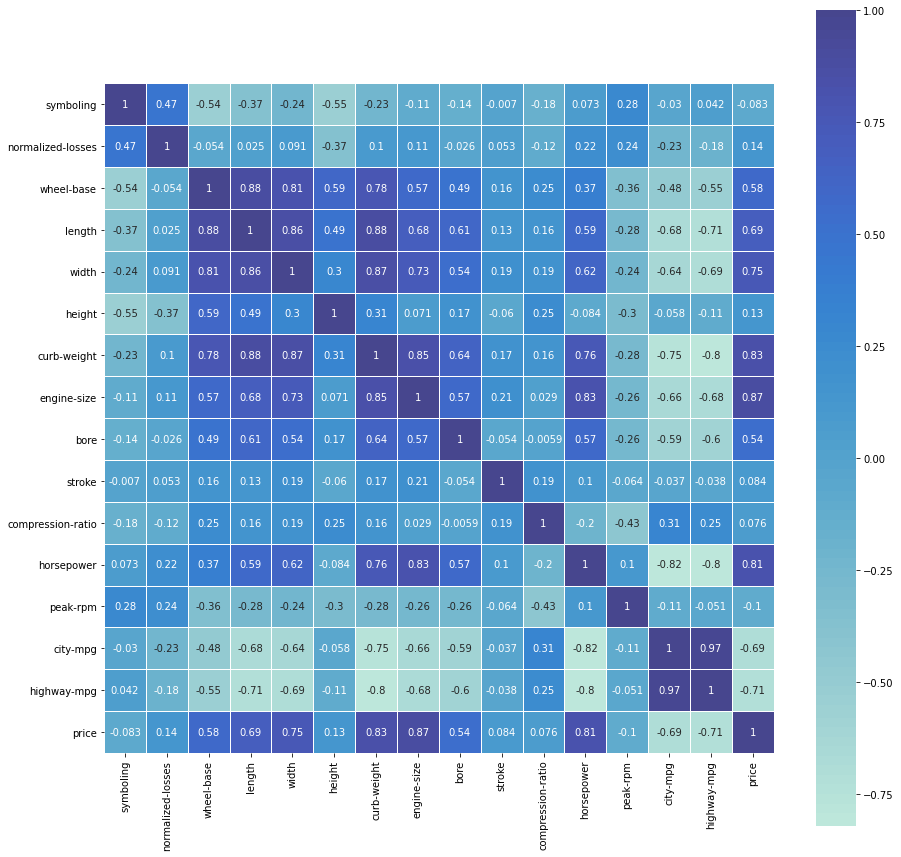

In [17]:
corr = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()

f,axes = plt.subplots(1,1,figsize= (15,15))
sns.heatmap(corr, square=True, annot= True, linewidth= 0.5, center= 2, ax=axes)

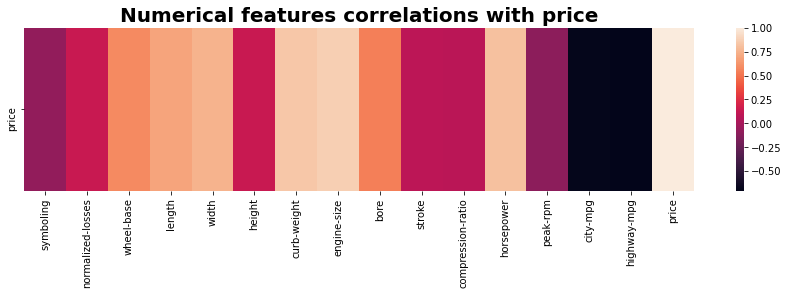

In [18]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax= plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by= ['price'], ascending= False).head(1))
plt.title("Numerical features correlations with price", weight= 'bold', fontsize= 20)

plt.show()

In [19]:
Num = numcorr['price'].sort_values(ascending= False).to_frame()
cm = sns.light_palette('cyan', as_cmap= True)
s = Num.style.background_gradient(cmap= cm)
s

,price
price,1.000000
engine-size,0.872152
curb-weight,0.834059
horsepower,0.811081
width,0.751628
length,0.691207
wheel-base,0.583842
bore,0.542560
normalized-losses,0.135869
height,0.133639


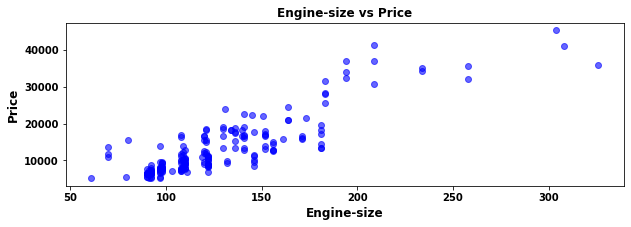

In [20]:
plt.figure(figsize= (10,3))
plt.scatter(x=df['engine-size'], y= df['price'], color= 'blue', alpha= 0.6)
plt.title('Engine-size vs Price', weight= 'bold', fontsize= 12)
plt.ylabel('Price', weight= 'bold', fontsize= 12)
plt.xlabel('Engine-size', weight= 'bold', fontsize=12)
plt.xticks(weight= 'bold')
plt.yticks(weight='bold')
plt.show()

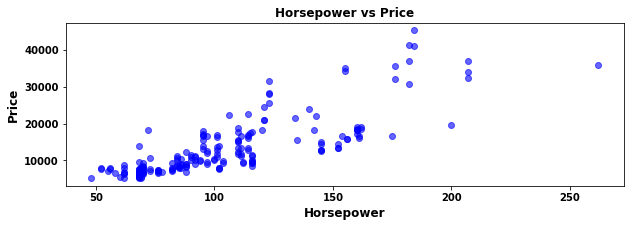

In [21]:
plt.figure(figsize= (10,3))
plt.scatter(x=df['horsepower'], y= df['price'], color= 'blue', alpha= 0.6)
plt.title('Horsepower vs Price', weight= 'bold', fontsize= 12)
plt.ylabel('Price', weight= 'bold', fontsize= 12)
plt.xlabel('Horsepower', weight= 'bold', fontsize=12)
plt.xticks(weight= 'bold')
plt.yticks(weight='bold')
plt.show()

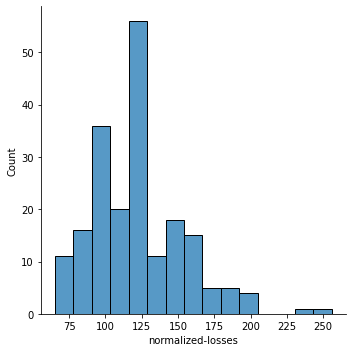

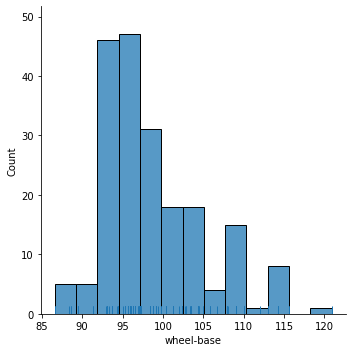

In [22]:
sns.displot(df['normalized-losses'])

plt.show()

sns.displot(df['wheel-base'], rug= True)

plt.show()

In [23]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

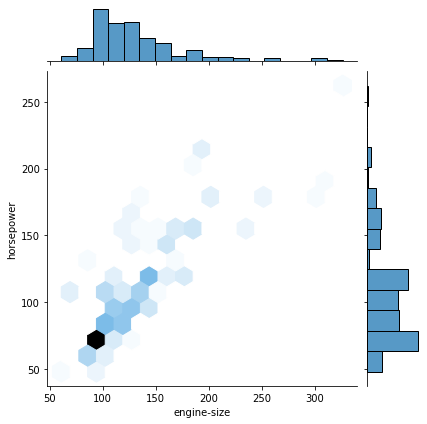

In [24]:
sns.jointplot(data=df, x=df['engine-size'], y=df['horsepower'], kind= 'hex')
plt.show()

C:\Users\hp\Documents\Python Scripts\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Documents\Python Scripts\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


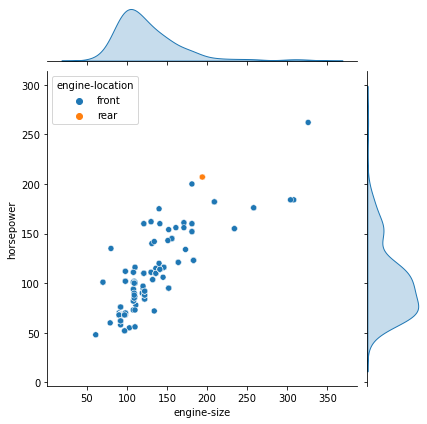

In [25]:
sns.jointplot(data=df, x=df['engine-size'], y=df['horsepower'], hue= 'engine-location')
plt.show()

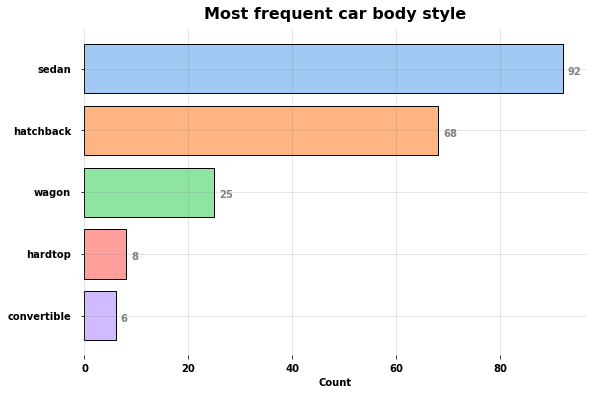

In [26]:
df.rename(columns= {'body-style': 'bodystyle'}, inplace= True)


fig, ax = plt.subplots(figsize=(9,6))

title_cnt=df.bodystyle.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))


for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
    
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color= 'grey', linestyle='-', linewidth=1, alpha= 0.2)


ax.invert_yaxis()

ax.set_title("Most frequent car body style", weight= 'bold', loc= 'center', pad= 10, fontsize=16)

ax.set_xlabel('Count', weight= 'bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
           fontsize= 10, fontweight= 'bold', color= 'grey')
    
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

plt.show()

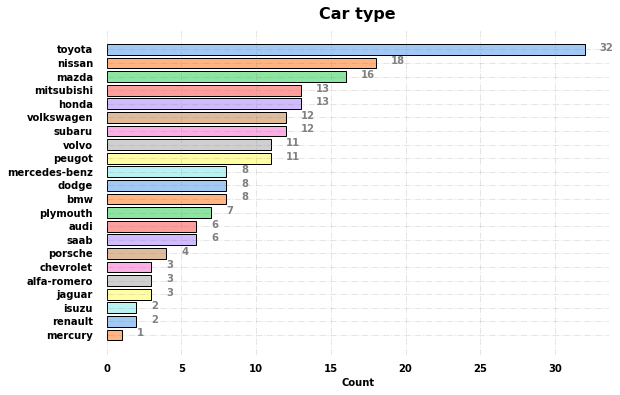

In [29]:
fig , ax= plt.subplots(figsize=(9,6))

title_cnt= df.make.value_counts().sort_values(ascending = False).reset_index()
mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor= 'black', color= sns.color_palette("pastel", len(title_cnt)))


for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
    
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


ax.grid(b=True, color= 'grey', linestyle='-.', linewidth= 1, alpha= 0.2)


ax.invert_yaxis()

ax.set_title('Car type', weight= 'bold', loc='center', pad= 10, fontsize= 16 )
ax.set_xlabel('Count', weight= 'bold')

for i in ax.patches:
    ax.text(i.get_width()+ 1, i.get_y()+0.5, str(round((i.get_width()), 2)),
           fontsize= 10, fontweight='bold', color= 'grey')
    
plt.yticks(weight='bold')
plt.xticks(weight= 'bold')


plt.show()
plt.show()

In [30]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.844221,121.840491,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331949,3.255538,10.114171,103.604061,5118.020305,25.130653,30.633166,13242.613065
std,1.259651,32.103986,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.448626,478.600274,6.408881,6.801746,7978.344857
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5118.020305,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
df.select_dtypes(include= np.number).columns.tolist()

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [33]:
df.shape

(199, 26)

In [34]:
df.select_dtypes(include=np.object).columns.tolist()

C:\Users\hp\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'bodystyle',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

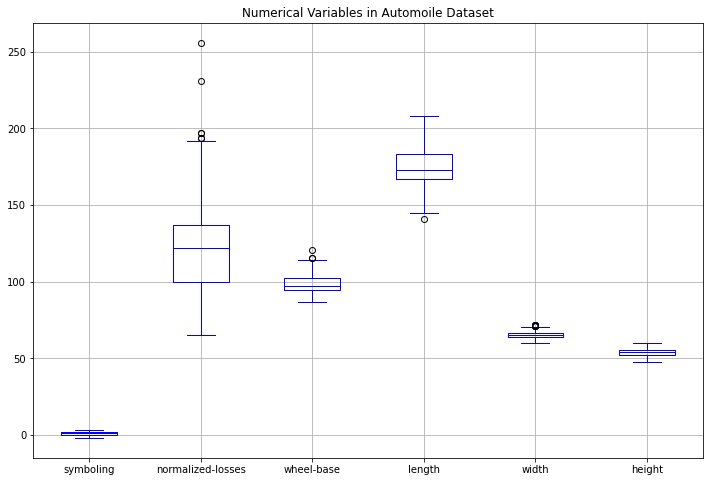

In [35]:
numerical_cols = ['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height']

plt.figure(figsize= (12,8))
plt.title("Numerical Variables in Automoile Dataset")
df[numerical_cols].boxplot(color= 'blue')
plt.show()

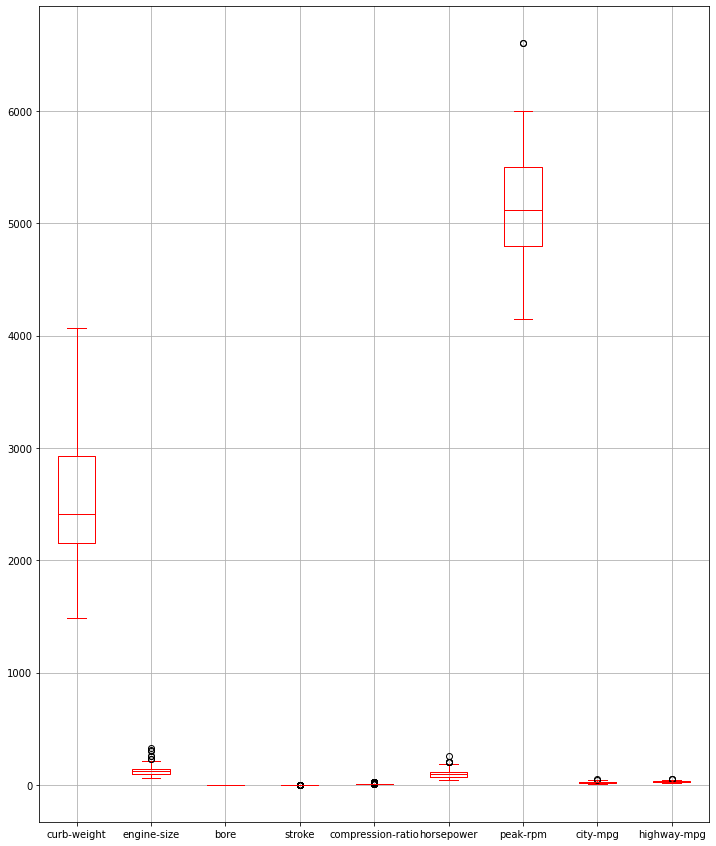

In [37]:
numerical_cols = ['curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

plt.figure(figsize= (12,15))
df[numerical_cols].boxplot(color= 'red')
plt.show()

In [38]:
df.rename(columns= {'normalized-losses': 'normalizedlosses', 'peak-rpm': 'peakrpm'}, inplace= True)
df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'bodystyle', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [39]:
df['normalizedlosses'].unique()

array([121.8404908, 164.       , 158.       , 192.       , 188.       ,
       121.       ,  98.       ,  81.       , 118.       , 148.       ,
       110.       , 145.       , 137.       , 101.       ,  78.       ,
       106.       ,  85.       , 107.       , 104.       , 113.       ,
       150.       , 129.       , 115.       ,  93.       , 142.       ,
       161.       , 153.       , 125.       , 128.       , 122.       ,
       103.       , 168.       , 108.       , 194.       , 231.       ,
       119.       , 154.       ,  74.       , 186.       ,  83.       ,
       102.       ,  89.       ,  87.       ,  77.       ,  91.       ,
       134.       ,  65.       , 197.       ,  90.       ,  94.       ,
       256.       ,  95.       ])

In [40]:
df['normalizedlosses'] = df['normalizedlosses'].replace(256.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace= True)
df['normalizedlosses'] = df['normalizedlosses'].replace(231.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace= True)
df['normalizedlosses'].unique()

array([121.8404908 , 164.        , 158.        , 192.        ,
       188.        , 121.        ,  98.        ,  81.        ,
       118.        , 148.        , 110.        , 145.        ,
       137.        , 101.        ,  78.        , 106.        ,
        85.        , 107.        , 104.        , 113.        ,
       150.        , 129.        , 115.        ,  93.        ,
       142.        , 161.        , 153.        , 125.        ,
       128.        , 122.        , 103.        , 168.        ,
       108.        , 194.        , 120.60818478, 119.        ,
       154.        ,  74.        , 186.        ,  83.        ,
       102.        ,  89.        ,  87.        ,  77.        ,
        91.        , 134.        ,  65.        , 197.        ,
        90.        ,  94.        , 121.16291752,  95.        ])

In [41]:
df['peakrpm'].unique()

array([5000.        , 5500.        , 5800.        , 4250.        ,
       5400.        , 5100.        , 4800.        , 6000.        ,
       4750.        , 4200.        , 4350.        , 4500.        ,
       5200.        , 4150.        , 5600.        , 5900.        ,
       5118.02030457, 5250.        , 4900.        , 4400.        ,
       6600.        , 5300.        ])

In [42]:
df[df.peakrpm == 6600.0]

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [43]:
i = df[((df.peakrpm == 6600.0))].index
df = df.drop(i)

In [44]:
df.select_dtypes(include=['object']).copy().head()

,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [45]:
print(df['num-of-doors'].value_counts())
print(df['num-of-cylinders'].value_counts())

four    113
two      84
Name: num-of-doors, dtype: int64
four      153
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


In [46]:
cleanup_nums = {'num-of-doors':  {"four": 4, "two": 2},
               'num-of-cylinders': {"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "twelve": 12, "three": 3}}

df = df.replace(cleanup_nums)
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [49]:
print(df['bodystyle'].unique())
print(df['drive-wheels'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [50]:
df = pd.get_dummies(df, columns= ["bodystyle", "drive-wheels"], prefix= ["body", "drive"])
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,highway-mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,121.840491,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.000000,audi,gas,std,4,front,99.8,176.6,66.2,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.000000,audi,gas,std,4,front,99.4,176.6,66.4,...,22,17450.0,0,0,0,1,0,1,0,0


In [51]:
df.shape

(197, 32)

In [52]:
df['engine-type'].value_counts()

ohc      143
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
Name: engine-type, dtype: int64

In [54]:
df['OHC_Code'] = np.where(df["engine-type"].str.contains("ohc"), 1, 0)
df[["make", "engine-type", "OHC_Code"]].head()

,make,engine-type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


In [55]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc= OrdinalEncoder()
df['make_code'] = ord_enc.fit_transform(df[['make']])
df[["make", 'make_code']].head(1)

,make,make_code
0,alfa-romero,0.0


In [56]:
print(df.columns)

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'OHC_Code',
       'make_code'],
      dtype='object')


In [57]:
df.select_dtypes(include=np.number).columns.tolist()

['symboling',
 'normalizedlosses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peakrpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_4wd',
 'drive_fwd',
 'drive_rwd',
 'OHC_Code',
 'make_code']

In [58]:
feed = df[['symboling', 'normalizedlosses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
           'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-doors', 'num-of-cylinders', 'body_convertible', 
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code']]

feed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalizedlosses   197 non-null    float64
 2   wheel-base         197 non-null    float64
 3   length             197 non-null    float64
 4   width              197 non-null    float64
 5   height             197 non-null    float64
 6   curb-weight        197 non-null    int64  
 7   engine-size        197 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  197 non-null    float64
 11  horsepower         197 non-null    float64
 12  peakrpm            197 non-null    float64
 13  city-mpg           197 non-null    int64  
 14  highway-mpg        197 non-null    int64  
 15  price              197 non-null    float64
 16  num-of-doors       197 non

In [59]:
df_train_x = feed.drop('price', axis=1)
df_train_x.describe()

,symboling,normalizedlosses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,OHC_Code,make_code
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.842640,120.127050,98.866497,174.324365,65.915736,53.785787,2560.862944,127.340102,3.332882,3.257321,...,0.030457,0.040609,0.340102,0.461929,0.126904,0.040609,0.588832,0.370558,0.918782,12.294416
std,1.265963,29.391750,6.101313,12.372840,2.108318,2.456292,521.077834,41.812276,0.269743,0.318472,...,0.172279,0.197886,0.474950,0.499819,0.333713,0.197886,0.493299,0.484185,0.273866,6.244558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,98.000000,94.500000,166.800000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.330000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000
75%,2.000000,134.000000,102.400000,183.500000,66.900000,55.600000,2935.000000,145.000000,3.590000,3.410000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,19.000000
max,3.000000,197.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [60]:
df_train_y = feed['price']
df_train_y.describe()

count      197.000000
mean     13281.441624
std       8009.531382
min       5118.000000
25%       7775.000000
50%      10345.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state= 42)

# Linear Regression Model

In [62]:
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)

# r2_score of Linear Regression

In [68]:
print("r2_score is : ", r2_score(y_test, predictions))

r2_score is :  0.9052281109949658


<AxesSubplot:xlabel='price'>

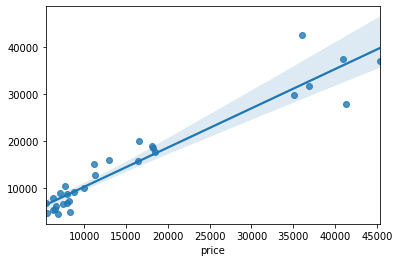

In [69]:
sns.regplot(x = y_test, y= predictions)

# Gradient Boosting Regressor Model

In [70]:
print("r2_score is :" , r2_score(y_test, predictions))

r2_score is : 0.9052281109949658


<AxesSubplot:xlabel='price'>

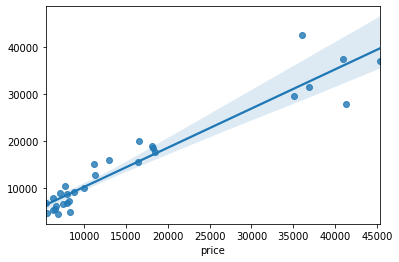

In [71]:
sns.regplot(x= y_test, y= predictions)